**K-NEAREST NEIGHBOURS**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

importing required libariers

1. Load the Dataset

In [ ]:
filename = 'Zoo.csv'
df = pd.read_csv(filename)

In [ ]:
df.head()

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1

Load Zoo.csv using pandas to get the animal features and class labels. This forms the base for your analysis.

2. Data Analysis

In [ ]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None
             hair 

Use .info(), .describe(), and plots to understand feature types, distribution, and class balance (e.g., count of each animal type).

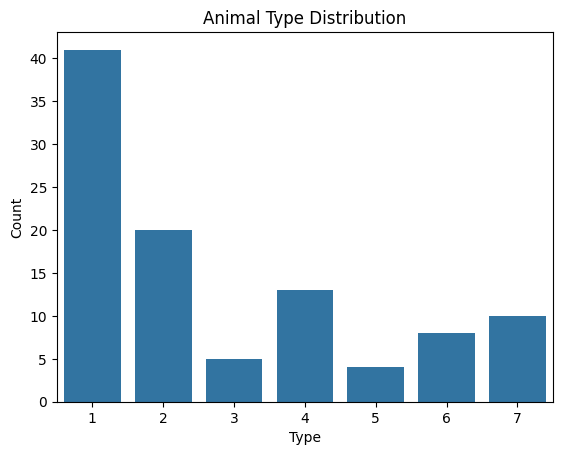

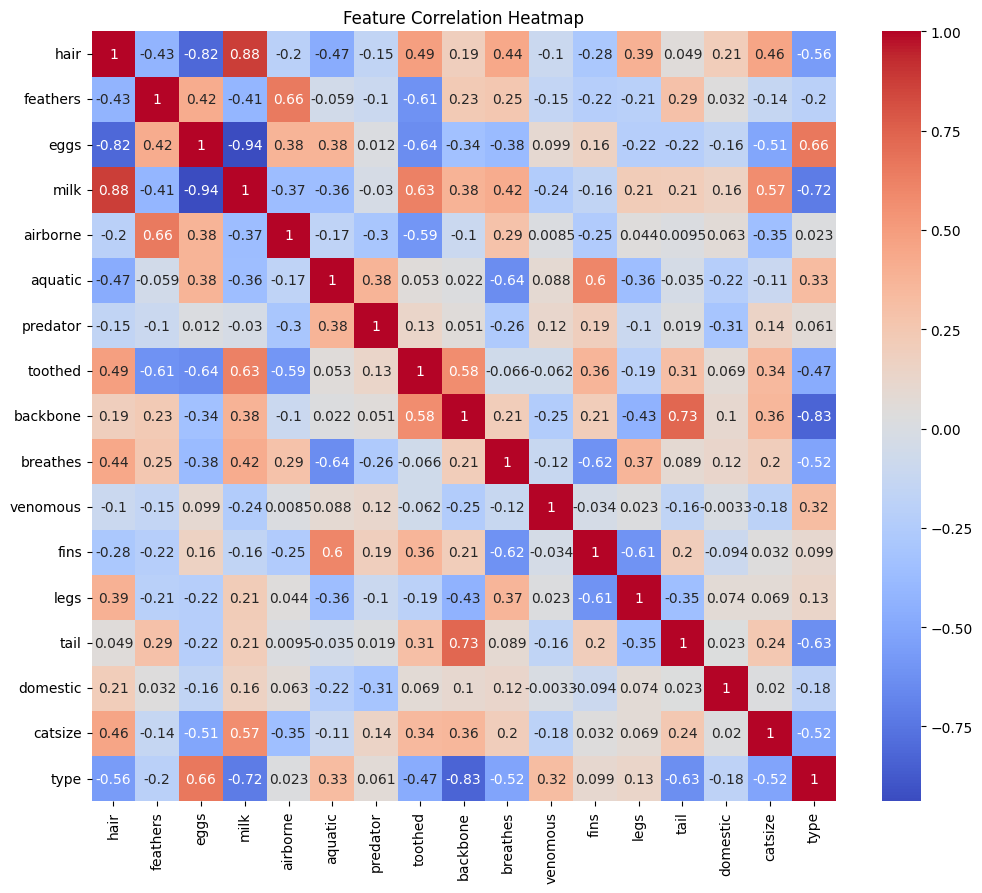

In [ ]:
# Count of each animal type
sns.countplot(x='type', data=df)
plt.title('Animal Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop('animal name', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

3. Preprocessing

In [ ]:
print(df.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [ ]:
df.drop('animal name', axis=1, inplace=True)

Drop the "animal name" column since it's just an identifier. Check for missing values (though this dataset has none).

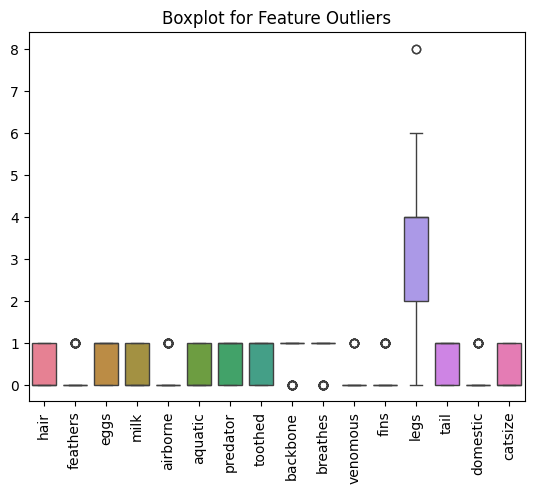

In [ ]:
# Outlier check (optional visual)
sns.boxplot(data=df.drop('type', axis=1))
plt.xticks(rotation=90)
plt.title('Boxplot for Feature Outliers')
plt.show()

4. Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('type', axis=1)
y = df['type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We divide the dataset into 80% training and 20% testing using train_test_split().
This ensures the model is trained on a large portion and tested on unseen data.
The split is random but reproducible using a fixed random_state.
This helps evaluate model performance fairly without data leakage.

5. Feature Scaling

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Since KNN relies on distance calculations, feature scaling is important.
We use StandardScaler to bring all features to the same scale (mean=0, std=1).
Scaling avoids bias toward features with larger ranges.
Both training and testing sets are scaled using the same scaler.

6. Implement KNN and Tune with Grid Search

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Grid Search for best k
param_grid = {'n_neighbors': list(range(1, 21))}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10)
grid.fit(X_train_scaled, y_train)

print("Best k:", grid.best_params_['n_neighbors'])
print("Best CV score:", grid.best_score_)

# Final model with best k
best_k = grid.best_params_['n_neighbors']
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train_scaled, y_train)


Best k: 1
Best CV score: 0.9375


KNeighborsClassifier(n_neighbors=1)

We use GridSearchCV to find the best value of k (number of neighbors).
We test values of k from 1 to 20 using 10-fold cross-validation.
The best k is selected based on the highest average validation accuracy.
This ensures the chosen model performs well across different data splits.

We initialize the KNN classifier with the best k from grid search.
The model is trained on the scaled training data.
It uses the default Euclidean distance (Minkowski with p=2).
This model is now ready to predict animal types on new data.

7. Evaluate Model Performance

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9523809523809523
Precision (macro): 0.7142857142857143
Recall (macro): 0.7142857142857143
F1 Score (macro): 0.7142857142857143

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         1

    accuracy                           0.95        21
   macro avg       0.71      0.71      0.71        21
weighted avg       0.95      0.95      0.95        21



We evaluate the model using test data and generate metrics like accuracy, precision, recall, and F1-score.
These metrics help assess how well the model classifies each animal type.
We use classification_report() for detailed per-class metrics.
The results indicate strong performance due to clean and balanced data.



8. Visualize Decision Boundaries

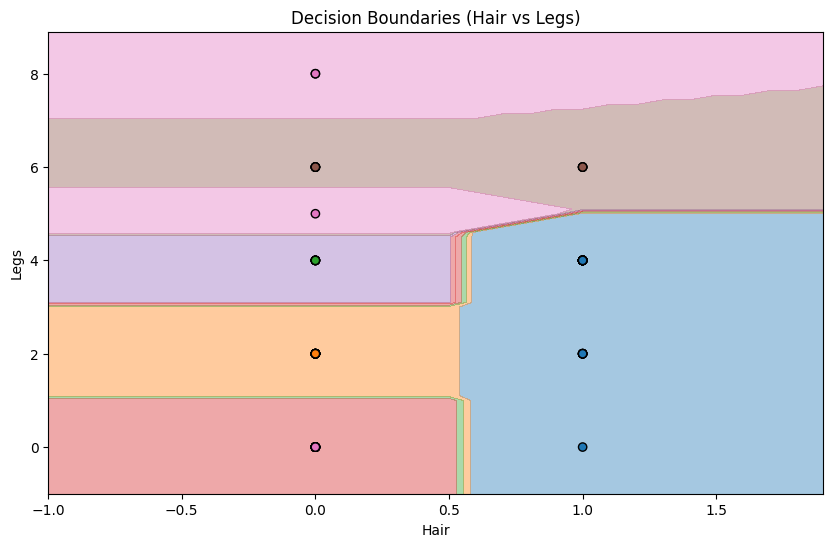

In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap

# Select two features for visualization
X_2d = df[['hair', 'legs']]
y_2d = df['type']

# Train-test split
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_2d, test_size=0.2, random_state=42)

# Train KNN
knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_train_2d, y_train_2d)

# Create meshgrid
x_min, x_max = X_2d.iloc[:, 0].min() - 1, X_2d.iloc[:, 0].max() + 1
y_min, y_max = X_2d.iloc[:, 1].min() - 1, X_2d.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(sns.color_palette("tab10", 7).as_hex()))
plt.scatter(X_2d.iloc[:, 0], X_2d.iloc[:, 1], c=y_2d, edgecolor='k', cmap=ListedColormap(sns.color_palette("tab10", 7).as_hex()))
plt.xlabel('Hair')
plt.ylabel('Legs')
plt.title('Decision Boundaries (Hair vs Legs)')
plt.show()


We select two features (e.g., hair and legs) for 2D visualization.
The decision boundary shows how KNN classifies animals in this feature space.
contourf() is used to shade regions predicted for each class.
While simplified, this helps visualize how KNN separates different classes.

**Interview Questions:**

1. What are the key hyperparameters in KNN?

* K (Number of Neighbors): Determines how many neighbors influence the classification. Too small K can lead to overfitting, too large can underfit.

* Distance Metric: Measures how similarity is calculated between points (e.g., Euclidean, Manhattan).

* Weights: Defines whether all neighbors contribute equally (uniform) or closer ones have more influence (distance).

2. What distance metrics can be used in KNN?

* Euclidean Distance: Most common; straight-line distance between two points.

* Manhattan Distance: Distance along axes at right angles (like in city blocks).

* Minkowski Distance: Generalized distance that includes both Euclidean and Manhattan as special cases.

* Hamming Distance: Used for categorical or binary features (counts differing bits).